In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Step 1: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Normalize features and encode target variable
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)


In [3]:
# Step 4: Implement a feedforward neural network 
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [11]:
# Step 5: Train the neural network using the training set and backpropagation
def train(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=1000):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        inputs = torch.FloatTensor(X_train)
        labels = torch.LongTensor(y_train)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {loss.item()}')

        # Validation loss and accuracy
        if epoch % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_inputs = torch.FloatTensor(X_val)
                val_labels = torch.LongTensor(y_val)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                val_losses.append(val_loss.item())

                _, predicted_train = torch.max(outputs, 1)
                train_correct = (predicted_train == labels).sum().item()
                train_total = labels.size(0)
                train_accuracy = train_correct / train_total
                train_accuracies.append(train_accuracy)

                _, predicted_val = torch.max(val_outputs, 1)
                val_correct = (predicted_val == val_labels).sum().item()
                val_total = val_labels.size(0)
                val_accuracy = val_correct / val_total
                val_accuracies.append(val_accuracy)

                print(f'Epoch {epoch}, Validation Loss: {val_loss.item()}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}')

    return train_losses, val_losses, train_accuracies, val_accuracies


In [12]:
# Step 6: Evaluate the trained model on the testing set and calculate accuracy
def evaluate(model, X_test, y_test):
    inputs = torch.FloatTensor(X_test)
    labels = torch.LongTensor(y_test)

    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy}')

In [13]:
# Step 7: Experiment with different hyperparameters
input_size = X_train.shape[1]
output_size = len(set(y_train))
hidden_size = 8

model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()


In [14]:
# Experiment with different optimizers
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)

In [20]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

def plot_accuracy(train_accuracies, val_accuracies):
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

Epoch 0, Train Loss: 0.5737342834472656
Epoch 0, Validation Loss: 0.5667646527290344, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 100, Train Loss: 0.5737055540084839
Epoch 100, Validation Loss: 0.5666455626487732, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 200, Train Loss: 0.5736774206161499
Epoch 200, Validation Loss: 0.5665473341941833, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 300, Train Loss: 0.573649525642395
Epoch 300, Validation Loss: 0.5664619207382202, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 400, Train Loss: 0.5736219882965088
Epoch 400, Validation Loss: 0.566386342048645, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 500, Train Loss: 0.5735946297645569
Epoch 500, Validation Loss: 0.5663178563117981, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 600, Train Loss: 0.5735673904418945
Epoch 600, Validation Loss: 0.5662540793418884, Train Accu

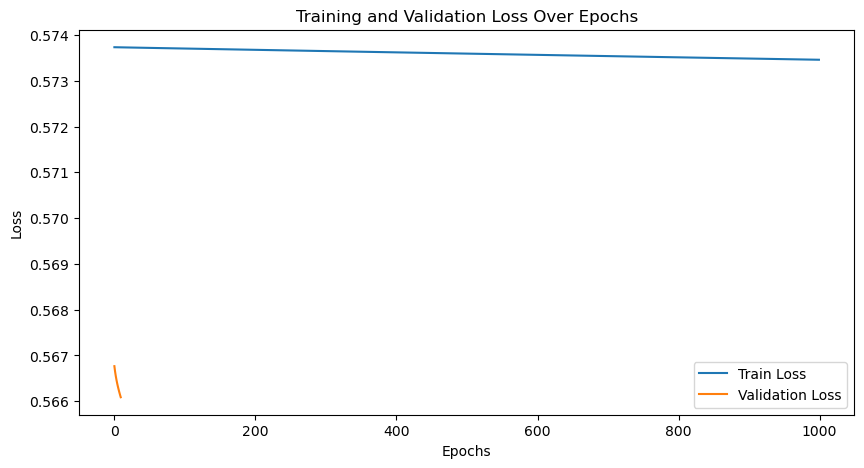

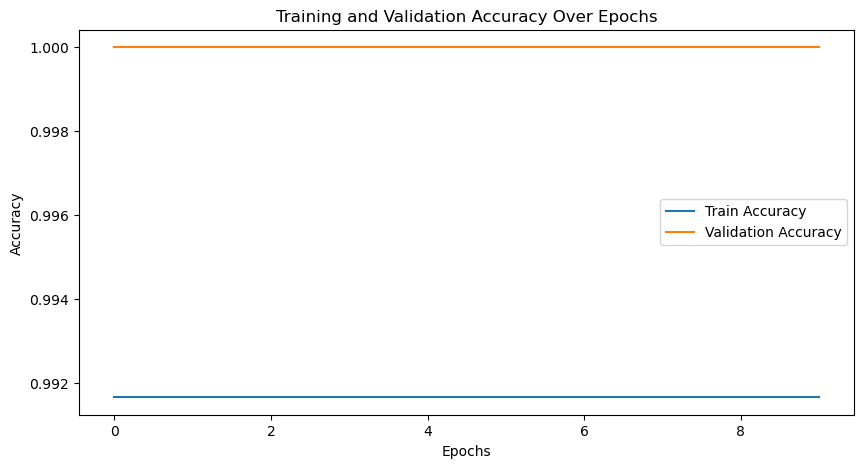

In [21]:
# Train with SGD optimizer
train_losses, val_losses, train_accuracies, val_accuracies = train(model, criterion, optimizer_sgd, X_train, y_train, X_test, y_test, epochs=1000)

evaluate(model, X_test, y_test)
# Plot the graphs
plot_loss(train_losses, val_losses)
plot_accuracy(train_accuracies, val_accuracies)

Epoch 0, Train Loss: 0.5734602808952332
Epoch 0, Validation Loss: 0.5660360455513, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 100, Train Loss: 0.5727031230926514
Epoch 100, Validation Loss: 0.5661898851394653, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 200, Train Loss: 0.5719574689865112
Epoch 200, Validation Loss: 0.5661336779594421, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 300, Train Loss: 0.5712194442749023
Epoch 300, Validation Loss: 0.5662229657173157, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 400, Train Loss: 0.5704925060272217
Epoch 400, Validation Loss: 0.5665328502655029, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 500, Train Loss: 0.5697811245918274
Epoch 500, Validation Loss: 0.5670406222343445, Train Accuracy: 0.9916666666666667, Validation Accuracy: 1.0
Epoch 600, Train Loss: 0.5690904259681702
Epoch 600, Validation Loss: 0.5677070021629333, Train Accur

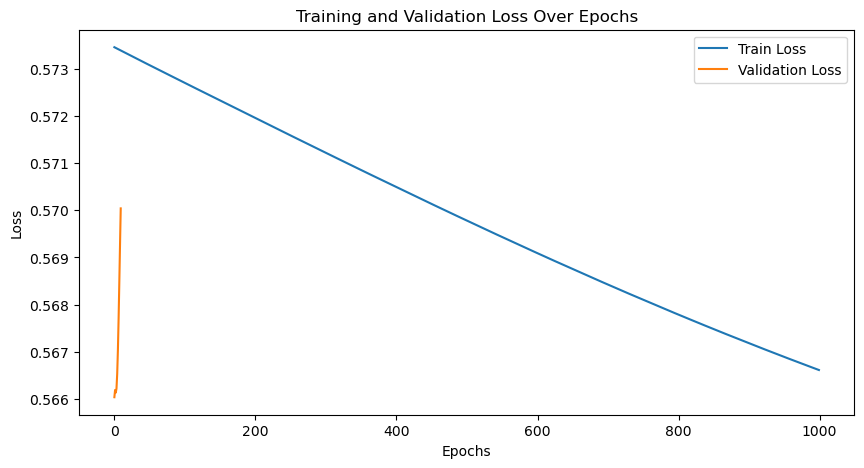

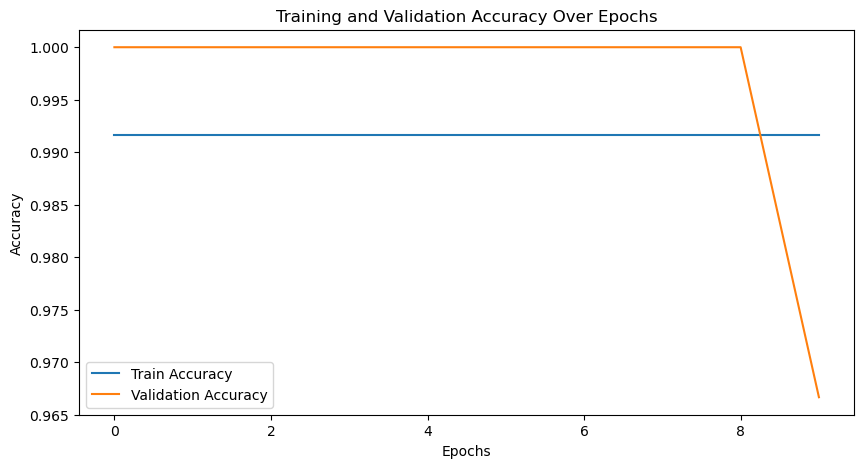

In [22]:
# Train with Adam optimizer
train_losses, val_losses, train_accuracies, val_accuracies = train(model, criterion, optimizer_adam, X_train, y_train, X_test, y_test, epochs=1000)

evaluate(model, X_test, y_test)
# Plot the graphs
plot_loss(train_losses, val_losses)
plot_accuracy(train_accuracies, val_accuracies)